In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
import numpy as np
from statistics import mode
import calendar
import scipy.stats as stats

In [12]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)

In [15]:
df_model.drop(['Unnamed: 0'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.4'], axis=1, inplace=True)

In [16]:
df_model.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [23]:
df_model['ServiceDateTime']=pd.to_datetime(df_model['ServiceDateTime'])

In [139]:
df_hybrid=df_model.loc[df_model['Powertrain'] == 'hybrid'].copy()
df_conventional=df_model.loc[df_model['Powertrain'] == 'conventional'].copy()
df_electric=df_model.loc[df_model['Powertrain'] == 'electric'].copy()

In [140]:
df_conventional['fuel_economy']=df_conventional['dist']/df_conventional['Energy']
df_hybrid['fuel_economy']=df_hybrid['dist']/df_hybrid['Energy']
df_electric['fuel_economy']=df_electric['dist']/df_electric['Energy']
df_conventional['energy_intensity']=df_conventional['Energy']/df_conventional['Onboard']
df_hybrid['energy_intensity']=df_hybrid['Energy']/df_hybrid['Onboard']
df_electric['energy_intensity']=df_electric['Energy']/df_electric['Onboard']

In [141]:
df_conventional.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Vehicle', 'VehicleType', 'SeatedCap',
       'TotalCap', 'Lat', 'Lon', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Daytype', 'Hour', 'Minute', 'Second', 'Date', 'Powertrain',
       'VehicleModel', 'Vehicle_mass', 'time_delta_in_seconds', 'dist',
       'Speed', 'Acceleration', 'elevation', 'grade', 'Energy', 'fuel_economy',
       'energy_intensity'],
      dtype='object')

In [142]:
#df_conventional_plot = df_conventional.groupby('Date').agg({'Energy':'sum'})[['Energy']].reset_index()

In [143]:
#df_hybrid_plot = df_hybrid.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

In [144]:
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('Gillig 30 ', 'C1')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XE35', 'E1')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('PROTERRA CATALYST BE-40', 'E3')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XE40', 'E2')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('Gillig 35', 'C2')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('Gillig 40', 'C3')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XD35', 'C4')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XDE40', 'H1')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XD40', 'C5')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XDE60', 'H2')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('ARTIC', '')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('(', '')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace(')', '')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38460\2745397764.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('(', '')
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38460\2745397764.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace(')', '')


In [145]:
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('Gillig 30 ', 'C1')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XE35', 'E1')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('PROTERRA CATALYST BE-40', 'E3')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XE40', 'E2')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('Gillig 35', 'C2')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('Gillig 40', 'C3')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XD35', 'C4')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XDE40', 'H1')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XD40', 'C5')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XDE60', 'H2')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('ARTIC', '')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('(', '')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace(')', '')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38460\1132139608.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('(', '')
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38460\1132139608.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace(')', '')


In [146]:
# Hourly energy consumption box plot
df_conventional['Hour']=df_conventional.ServiceDateTime.dt.hour

In [163]:
df_integrated_diesel_hourly_plot = df_conventional.groupby(['Vehicle','Date','Hour']).agg({'fuel_economy': ['mean'],'energy_intensity': ['mean']}).reset_index()

In [164]:
df_integrated_diesel_hourly_plot.columns = df_integrated_diesel_hourly_plot.columns.droplevel(1)
df_integrated_diesel_hourly_plot

,Vehicle,Date,Hour,fuel_economy,energy_intensity
0,1205,2021-10-01,6,6.435216,NaN
1,1205,2021-10-01,7,6.677220,NaN
2,1205,2021-10-01,8,6.463594,NaN
3,1205,2021-10-01,9,6.677841,0.096363
4,1205,2021-10-01,10,6.103831,0.052374
...,...,...,...,...,...
360933,7817,2022-09-30,17,6.749108,NaN
360934,7817,2022-09-30,18,4.459326,0.041073
360935,7817,2022-09-30,19,4.208721,NaN
360936,7817,2022-09-30,20,7.136394,NaN


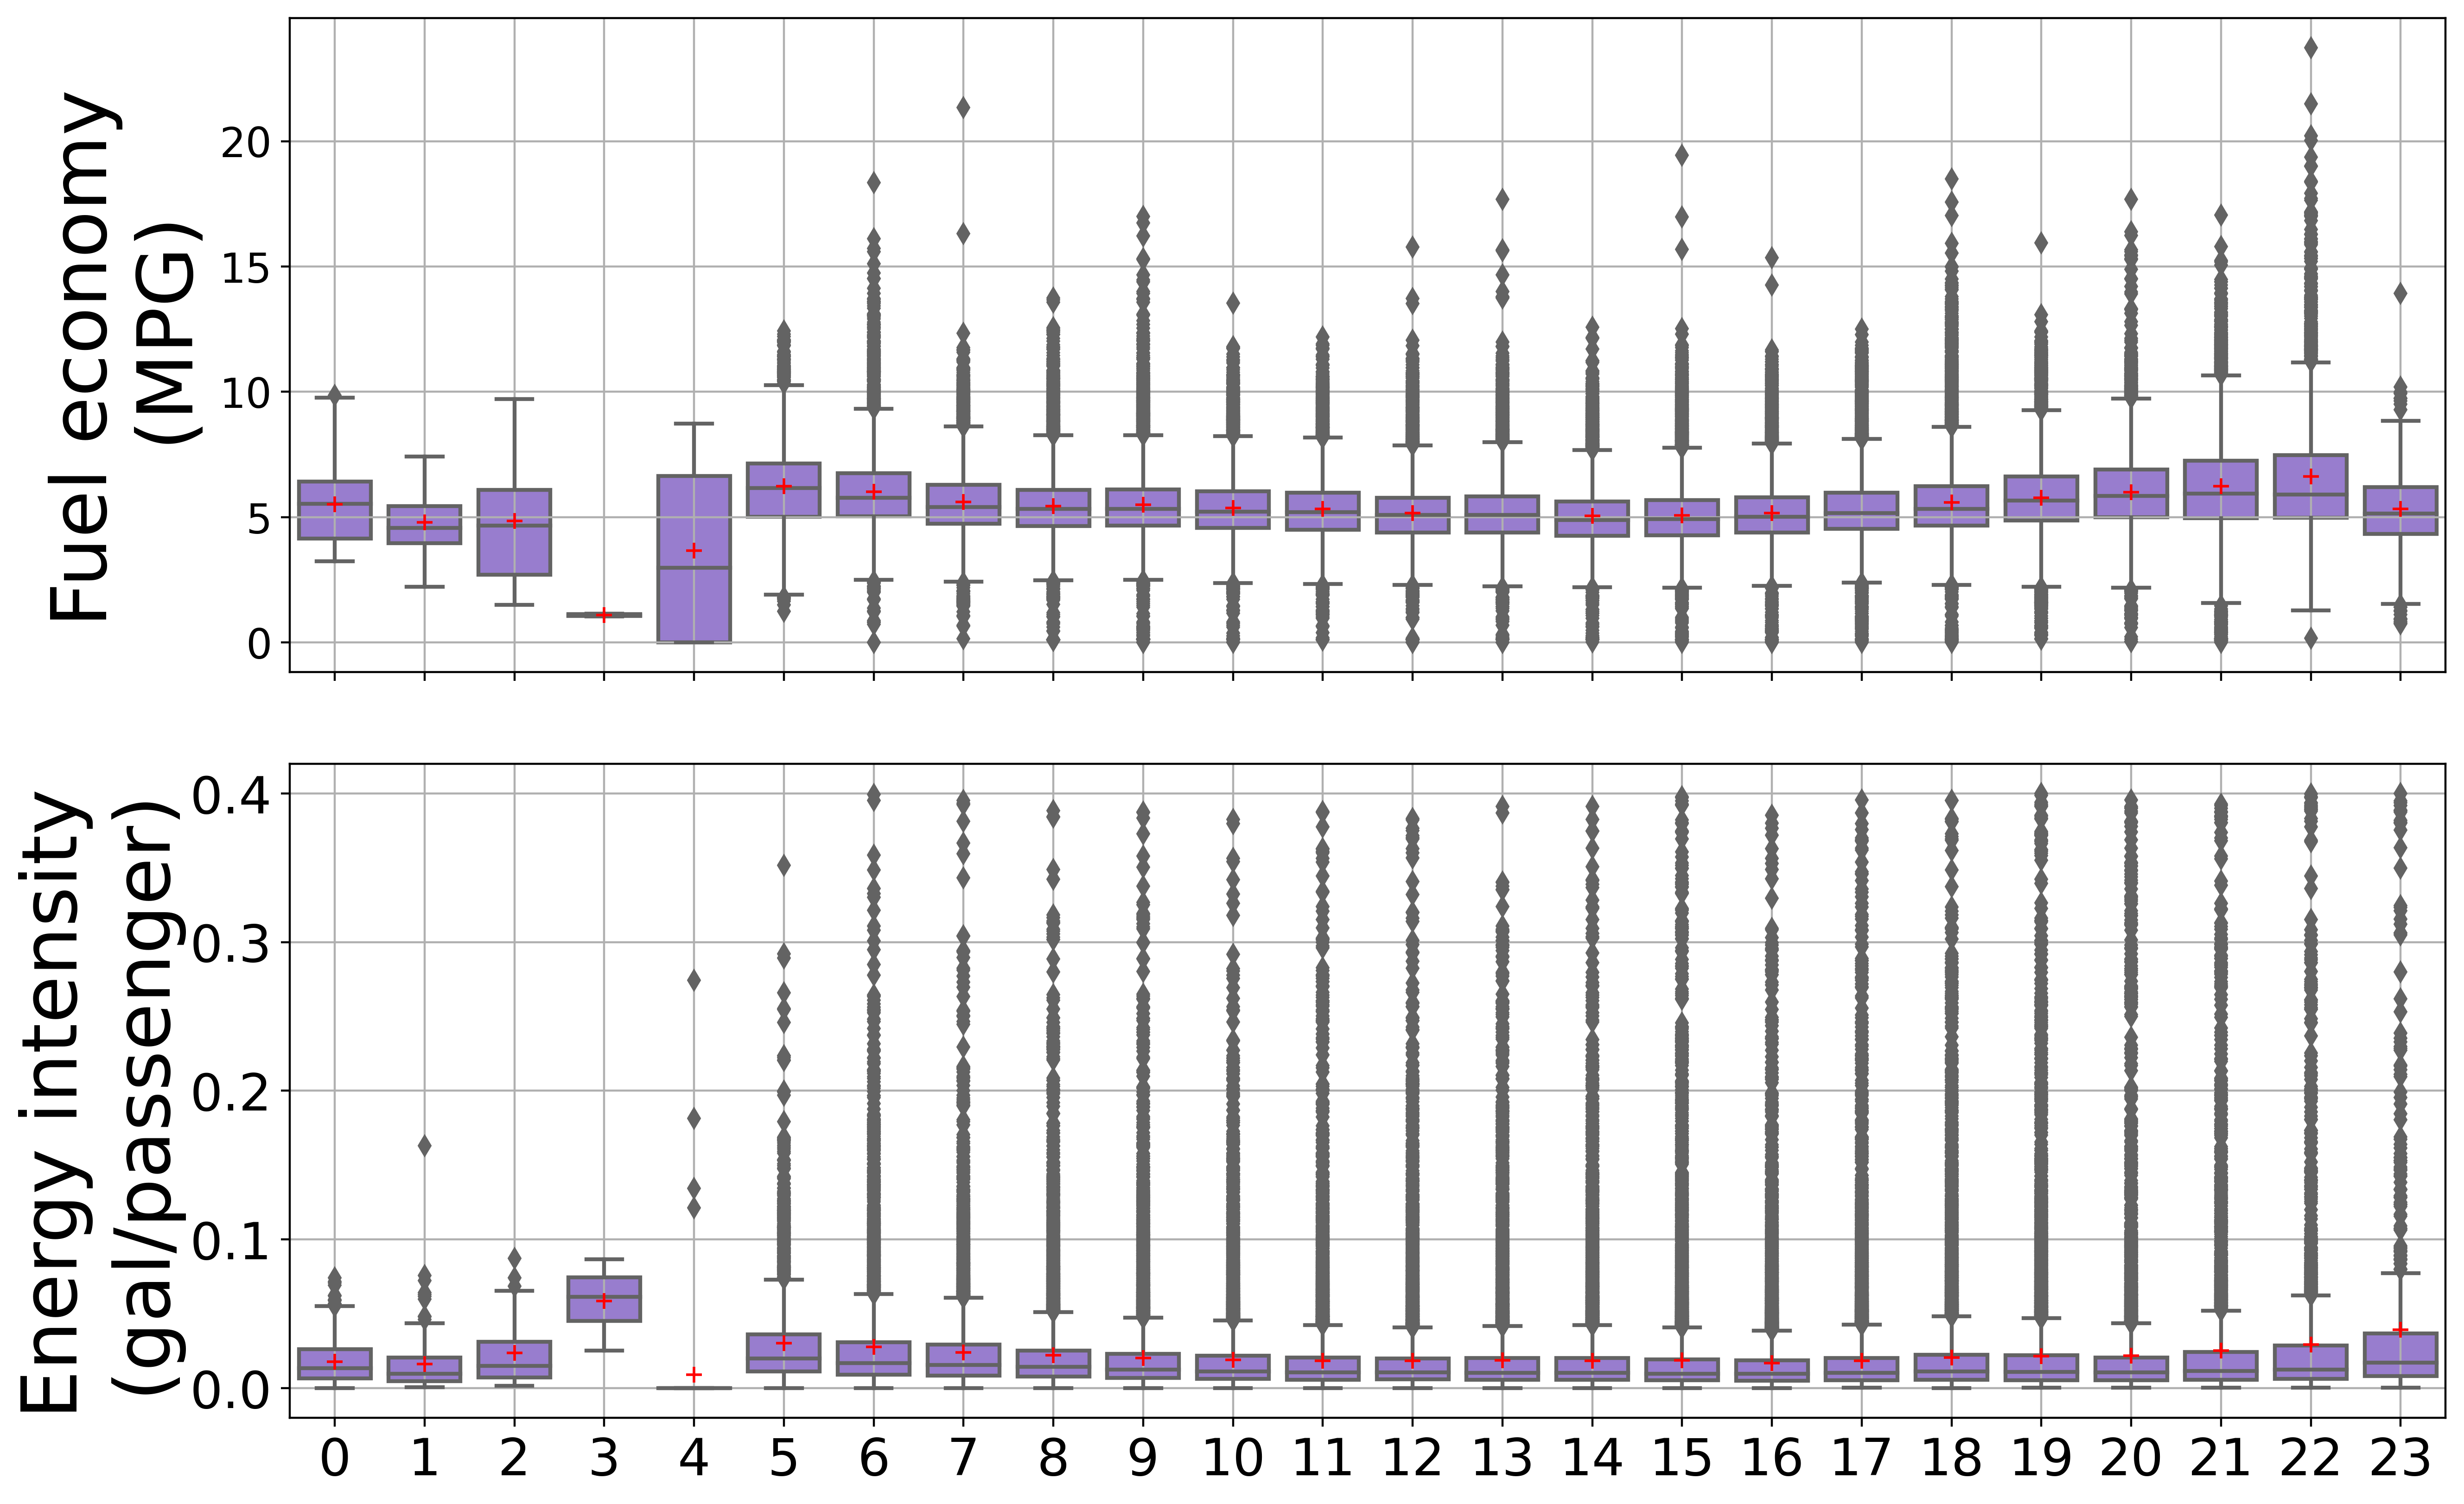

In [165]:
# Drop rows with missing or infinite values
df_integrated_diesel_hourly_plot['energy_intensity'] = df_integrated_diesel_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()
df_integrated_diesel_hourly_plot_clean = df_integrated_diesel_hourly_plot[df_integrated_diesel_hourly_plot['energy_intensity'] < 0.4]

fig, axs = plt.subplots(nrows=2, figsize=(15, 10), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.14)

sns.boxplot(x='Hour', y='fuel_economy', data=df_integrated_diesel_hourly_plot_clean, ax=axs[0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Fuel economy \n (MPG)', fontsize=30)
axs[0].tick_params(labelsize=16)
axs[0].grid(True)
#axs[1].set_ylim(0, 15)


sns.boxplot(x='Hour', y='energy_intensity', data=df_integrated_diesel_hourly_plot_clean, ax=axs[1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"}, color="mediumpurple")
axs[1].set_xlabel('')
axs[1].set_ylabel('Energy intensity \n(gal/passenger)', fontsize=30)
axs[1].tick_params(labelsize=20)
axs[1].grid(True)
#axs[1].set_ylim(0, 0.1)


fig.savefig(r'../../figures/hourly-results-facet-plot-diesel-vehicle-level-oct2021-sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [166]:
# Hourly energy consumption box plot for hybrid
df_hybrid['Hour']=df_hybrid.ServiceDateTime.dt.hour
df_integrated_hybrid_hourly_plot = df_hybrid.groupby(['Vehicle','Date','Hour']).agg({'fuel_economy': ['mean'],'energy_intensity': ['mean']}).reset_index()
df_integrated_hybrid_hourly_plot.columns = df_integrated_hybrid_hourly_plot.columns.droplevel(1)
df_integrated_hybrid_hourly_plot

,Vehicle,Date,Hour,fuel_economy,energy_intensity
0,1801,2021-10-05,14,6.291550,NaN
1,1801,2021-10-05,15,4.638421,0.012113
2,1801,2021-10-06,12,3.699168,0.005740
3,1801,2021-10-06,13,5.169443,0.018775
4,1801,2021-10-22,14,7.741405,NaN
...,...,...,...,...,...
17231,7902,2022-09-30,19,6.282585,NaN
17232,7902,2022-09-30,20,5.840009,NaN
17233,7902,2022-09-30,21,5.242462,0.004410
17234,7902,2022-09-30,22,6.648139,0.008473


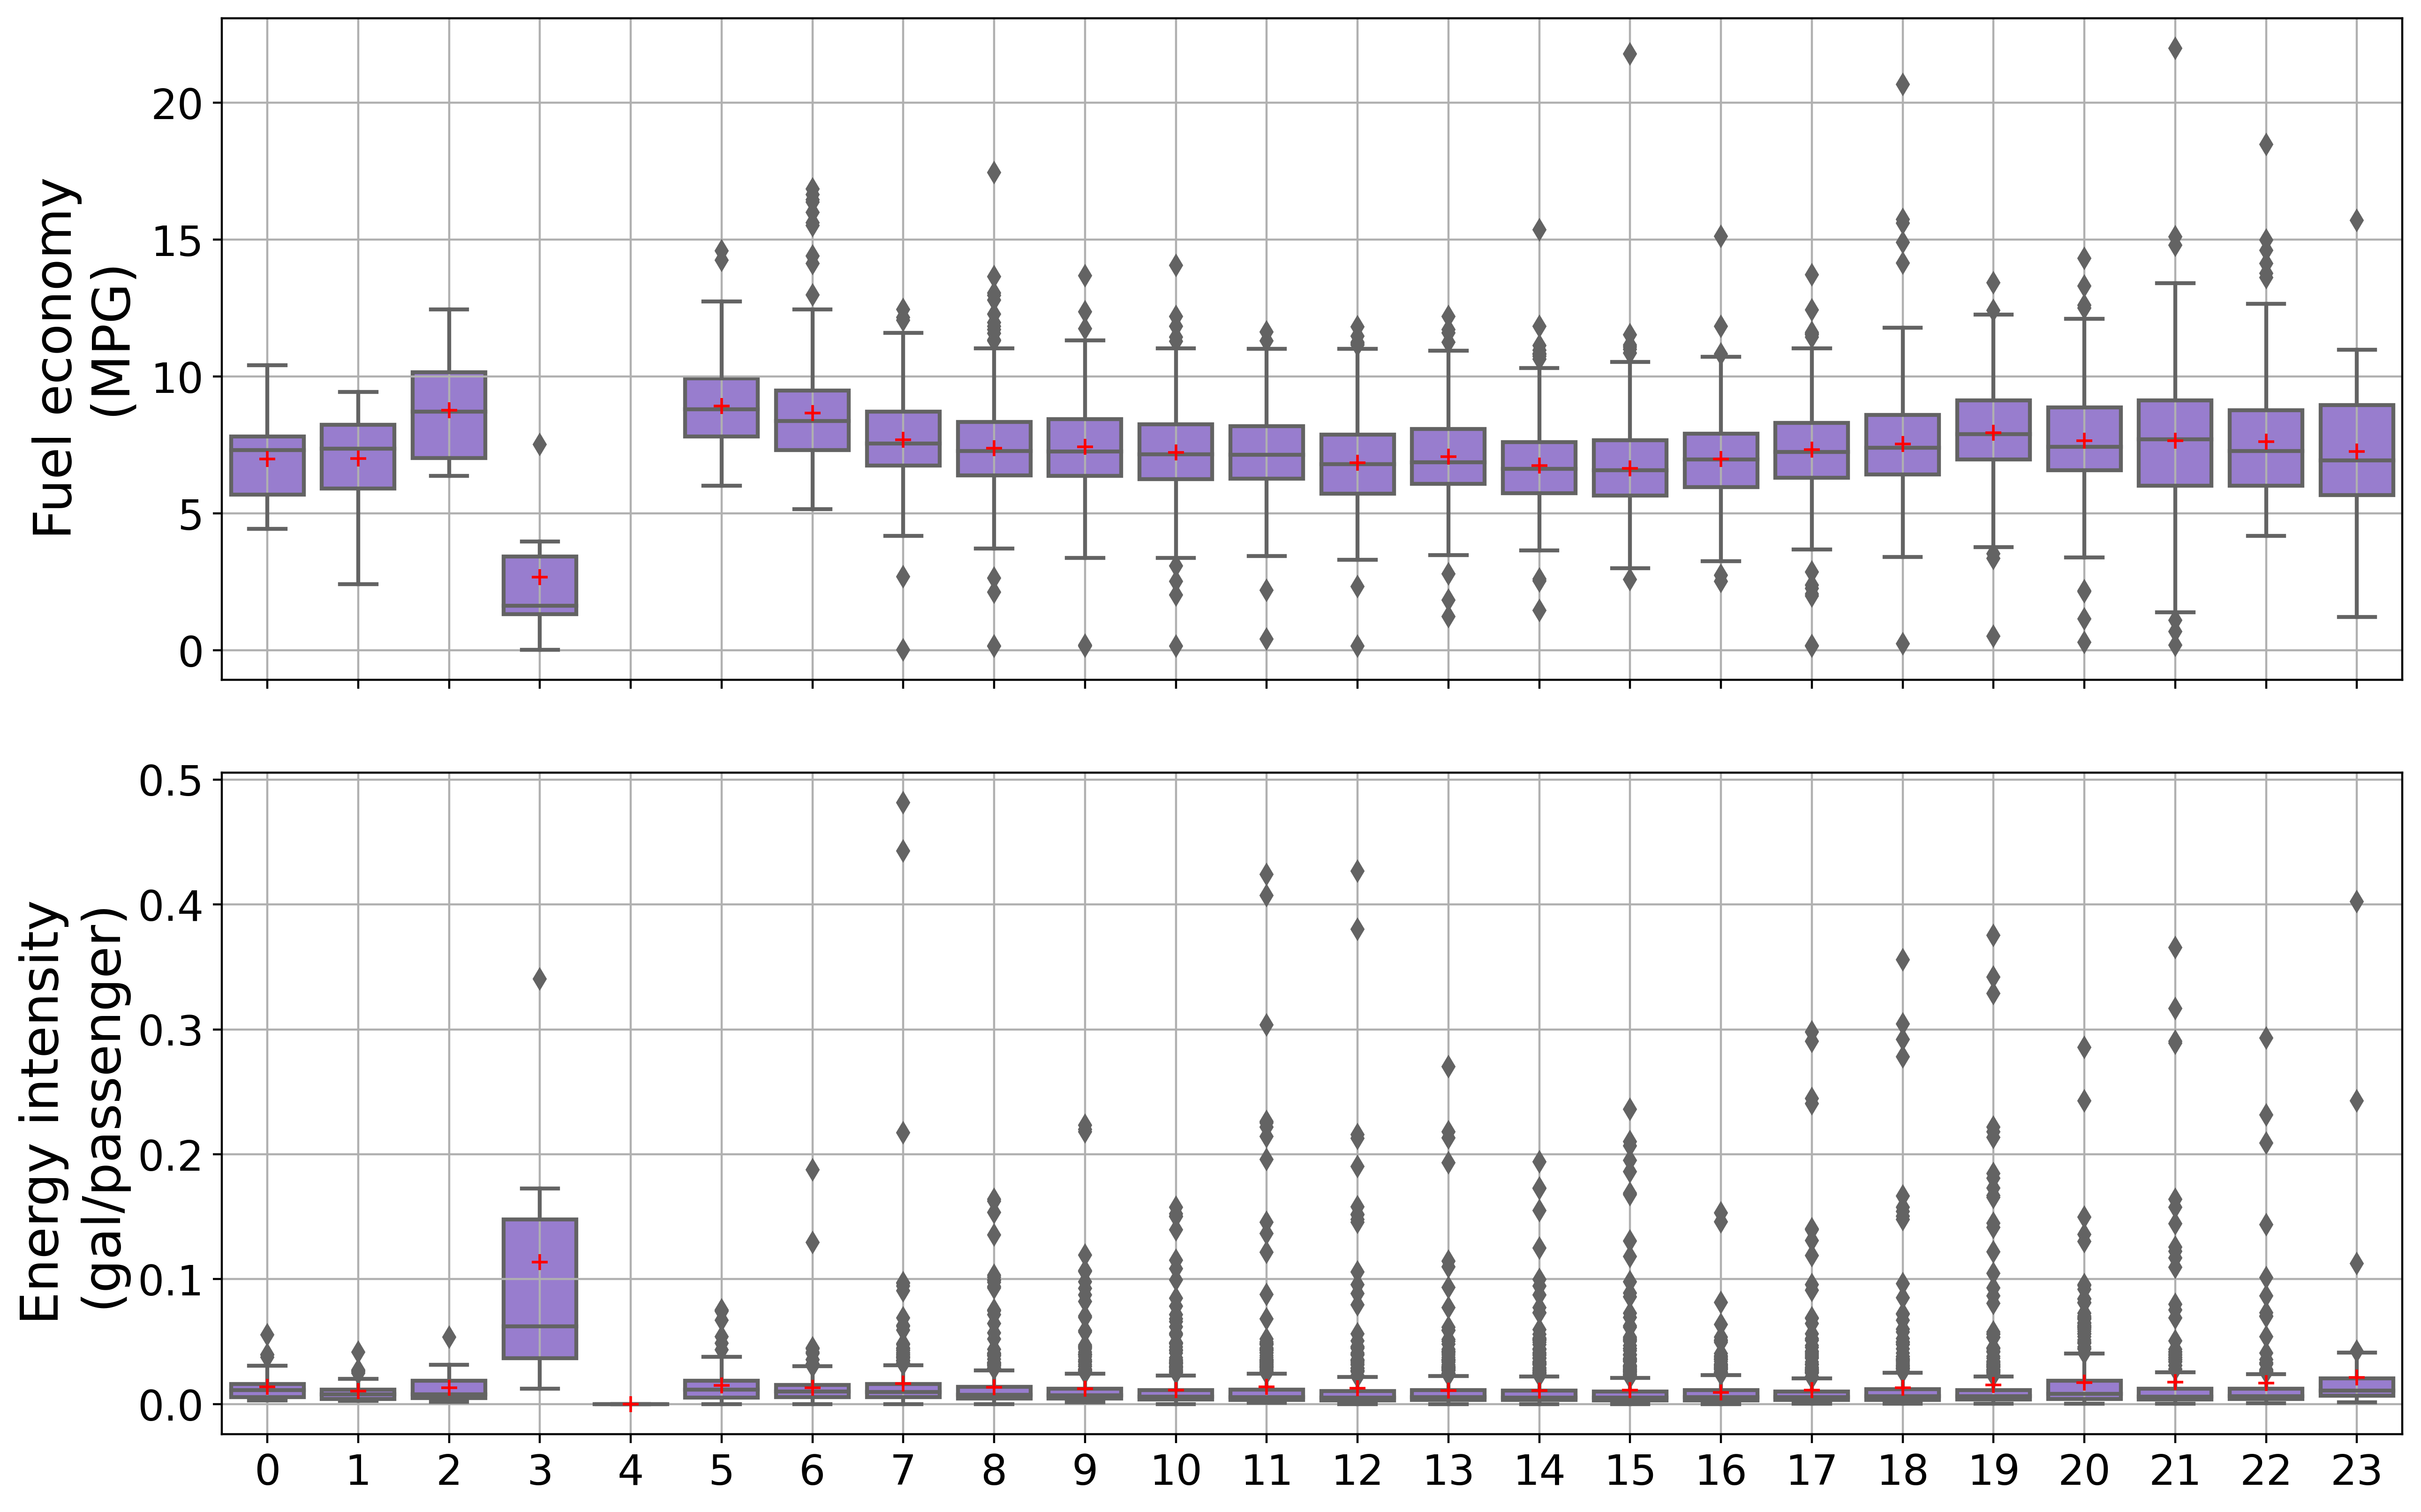

In [167]:
# Drop rows with missing or infinite values
df_integrated_hybrid_hourly_plot['energy_intensity'] = df_integrated_hybrid_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()
df_integrated_hybrid_hourly_plot_clean = df_integrated_hybrid_hourly_plot[df_integrated_hybrid_hourly_plot['energy_intensity'] < 0.5]

fig, axs = plt.subplots(nrows=2, figsize=(15, 10), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.14)

sns.boxplot(x='Hour', y='fuel_economy', data=df_integrated_hybrid_hourly_plot_clean, ax=axs[0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Fuel economy \n (MPG)', fontsize=20)
axs[0].tick_params(labelsize=16)
axs[0].grid(True)
#axs[1].set_ylim(0, 15)


sns.boxplot(x='Hour', y='energy_intensity', data=df_integrated_hybrid_hourly_plot_clean, ax=axs[1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"}, color="mediumpurple")
axs[1].set_xlabel('')
axs[1].set_ylabel('Energy intensity \n(gal/passenger)', fontsize=20)
axs[1].tick_params(labelsize=16)
axs[1].grid(True)
#axs[1].set_ylim(0, 0.1)


fig.savefig(r'../../figures/hourly-results-facet-plot-hybrid-vehicle-level-oct2021-sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [168]:
# Hourly energy consumption box plot for electric
df_electric['Hour']=df_electric.ServiceDateTime.dt.hour
df_integrated_electric_hourly_plot = df_electric.groupby(['Vehicle','Date','Hour']).agg({'fuel_economy': ['mean'],'energy_intensity': ['mean']}).reset_index()
df_integrated_electric_hourly_plot.columns = df_integrated_electric_hourly_plot.columns.droplevel(1)
df_integrated_electric_hourly_plot

,Vehicle,Date,Hour,fuel_economy,energy_intensity
0,1320,2021-12-03,14,3.138728e+12,0.512372
1,1320,2021-12-03,15,-4.919874e+24,NaN
2,1320,2021-12-03,16,5.846185e-01,NaN
3,1320,2021-12-07,14,-1.363501e+00,NaN
4,1320,2022-01-28,6,-1.044050e+88,NaN
...,...,...,...,...,...
13606,7700,2022-09-30,14,4.168071e+222,0.030171
13607,7700,2022-09-30,15,-5.449723e+105,0.014530
13608,7700,2022-09-30,16,5.081269e+23,0.023300
13609,7700,2022-09-30,17,-1.498856e+133,0.006469


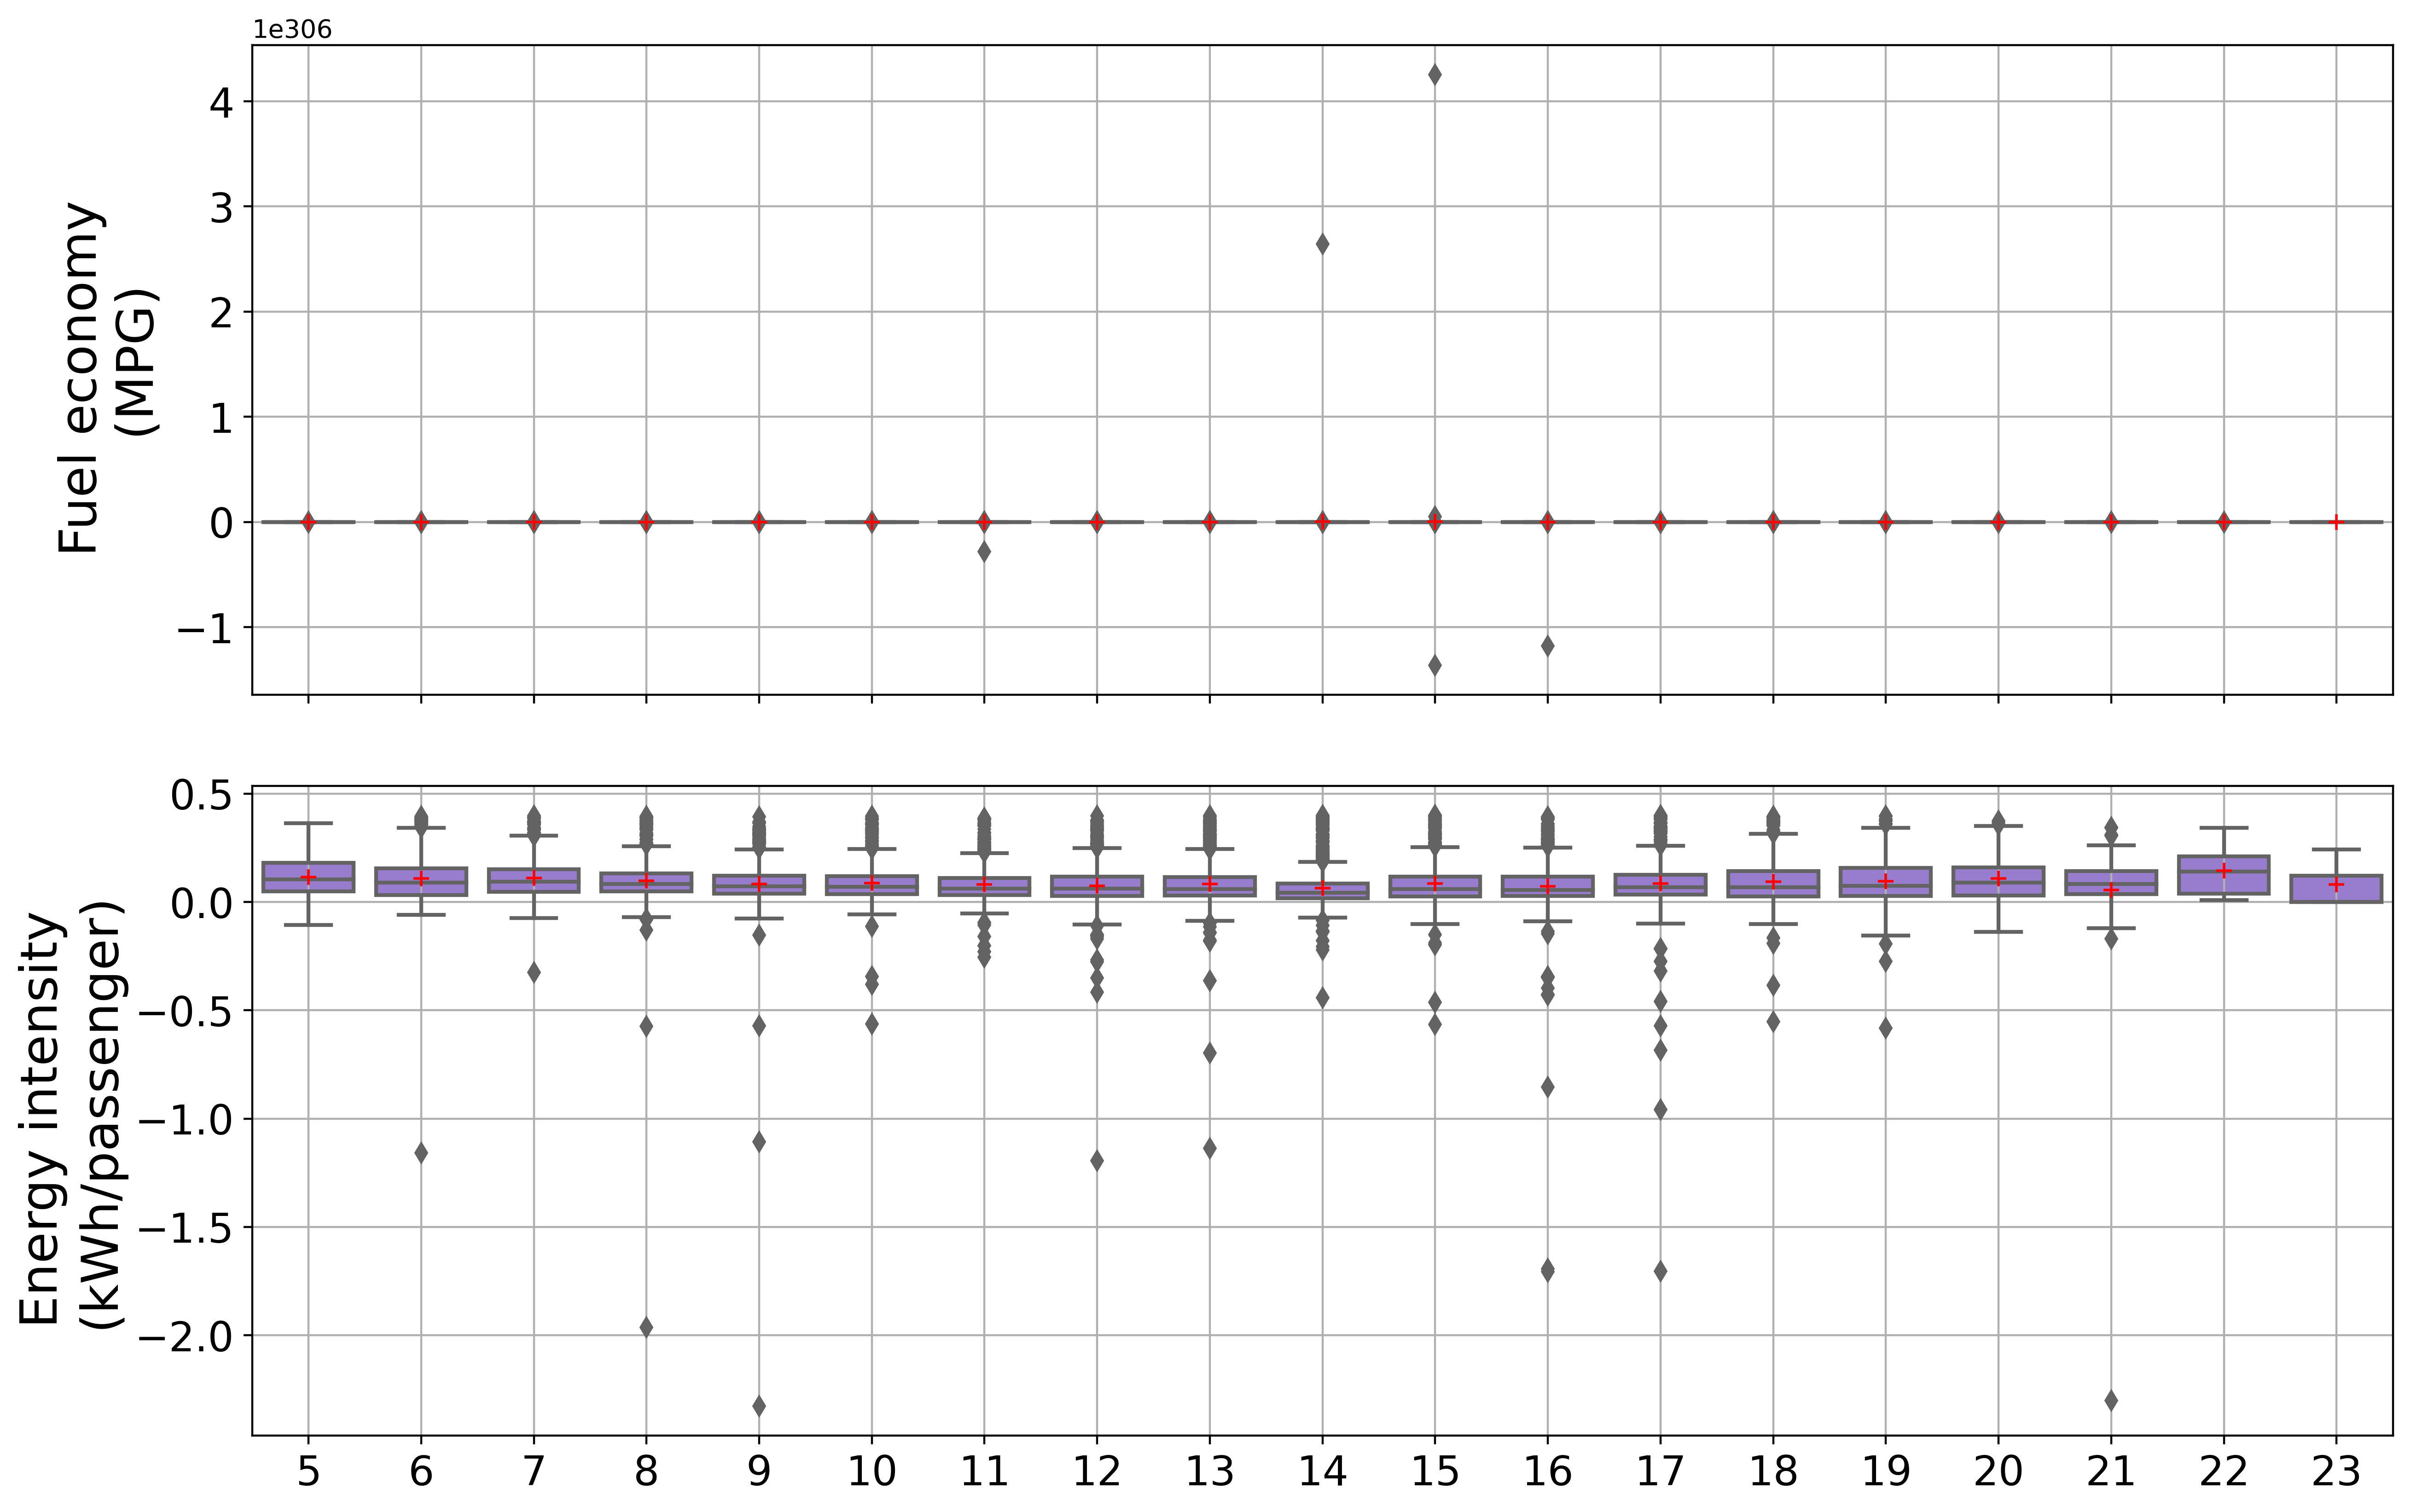

In [169]:
# Drop rows with missing or infinite values
df_integrated_electric_hourly_plot['energy_intensity'] = df_integrated_electric_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()
df_integrated_electric_hourly_plot = df_integrated_electric_hourly_plot[df_integrated_electric_hourly_plot['energy_intensity'] < 0.4]

fig, axs = plt.subplots(nrows=2, figsize=(15, 10), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.14)

sns.boxplot(x='Hour', y='fuel_economy', data=df_integrated_electric_hourly_plot, ax=axs[0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Fuel economy \n (MPG)', fontsize=20)
axs[0].tick_params(labelsize=16)
axs[0].grid(True)
#axs[1].set_ylim(0, 15)


sns.boxplot(x='Hour', y='energy_intensity', data=df_integrated_electric_hourly_plot, ax=axs[1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"}, color="mediumpurple")
axs[1].set_xlabel('')
axs[1].set_ylabel('Energy intensity \n(kWh/passenger)', fontsize=20)
axs[1].tick_params(labelsize=16)
axs[1].grid(True)
#axs[1].set_ylim(0, 0.1)


fig.savefig(r'../../figures/hourly-results-facet-plot-electric-vehicle-level-oct2021-sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [170]:
# Replace infinite values with NaN for consistency in both columns
df_integrated_diesel_hourly_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where either 'fuel_economy' or 'energy_intensity' is NaN
df_integrated_diesel_hourly_plot = df_integrated_diesel_hourly_plot.dropna(subset=['fuel_economy', 'energy_intensity'])

fuel_economy_conventional_mean=df_integrated_diesel_hourly_plot['fuel_economy'].mean()
fuel_economy_conventional_median=df_integrated_diesel_hourly_plot['fuel_economy'].median()
energy_intensity_conventional_mean=df_integrated_diesel_hourly_plot['energy_intensity'].mean()
energy_intensity_conventional_median=df_integrated_diesel_hourly_plot['energy_intensity'].median()
print("fuel economy conventional mean",fuel_economy_conventional_mean)
print("fuel economy conventional median",fuel_economy_conventional_median)
print("energy intensity conventional mean",energy_intensity_conventional_mean)
print("energy intensity conventional median",energy_intensity_conventional_median)

fuel economy conventional mean 5.4234692860113345
fuel economy conventional median 5.242327101565197
energy intensity conventional mean 0.020285426143364718
energy intensity conventional median 0.011400194279563066


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38460\722439221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel_hourly_plot.replace([np.inf, -np.inf], np.nan, inplace=True)


In [171]:
# Replace infinite values with NaN for consistency in both columns
df_integrated_hybrid_hourly_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where either 'fuel_economy' or 'energy_intensity' is NaN
df_integrated_hybrid_hourly_plot = df_integrated_hybrid_hourly_plot.dropna(subset=['fuel_economy', 'energy_intensity'])

fuel_economy_hybrid_mean=df_integrated_hybrid_hourly_plot['fuel_economy'].mean()
fuel_economy_hybrid_median=df_integrated_hybrid_hourly_plot['fuel_economy'].median()
energy_intensity_hybrid_mean=df_integrated_hybrid_hourly_plot['energy_intensity'].mean()
energy_intensity_hybrid_median=df_integrated_hybrid_hourly_plot['energy_intensity'].median()
fuel_economy_hybrid_min=df_integrated_hybrid_hourly_plot['fuel_economy'].min()
print("fuel economy hybrid mean",fuel_economy_hybrid_mean)
print("fuel economy hybrid median",fuel_economy_hybrid_median)
print("energy intensity hybrid mean",energy_intensity_hybrid_mean)
print("energy intensity hybrid median",energy_intensity_hybrid_median)

fuel economy hybrid mean 7.317269219982613
fuel economy hybrid median 7.200644522270887
energy intensity hybrid mean 0.013104767081014932
energy intensity hybrid median 0.006420668650278251


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38460\4174298355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_hybrid_hourly_plot.replace([np.inf, -np.inf], np.nan, inplace=True)


In [172]:
# Replace infinite values with NaN for consistency in both columns
df_electric.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where either 'fuel_economy' or 'energy_intensity' is NaN
df_electric_cleaned = df_electric.dropna(subset=['fuel_economy', 'energy_intensity'])

fuel_economy_electric_mean = df_electric_cleaned['fuel_economy'].mean()
fuel_economy_electric_median = df_electric_cleaned['fuel_economy'].median()
energy_intensity_electric_mean = df_electric_cleaned['energy_intensity'].mean()
energy_intensity_electric_median = df_electric_cleaned['energy_intensity'].median()

print("fuel economy electric mean:", fuel_economy_electric_mean)
print("fuel economy electric median:", fuel_economy_electric_median)
print("energy intensity electric mean:", energy_intensity_electric_mean)
print("energy intensity electric median:", energy_intensity_electric_median)

fuel economy electric mean: inf
fuel economy electric median: 0.17147910419277645
energy intensity electric mean: 0.10016617131022981
energy intensity electric median: 0.0017039774771079666


In [173]:
df_integrated_diesel_hourly_plot

,Vehicle,Date,Hour,fuel_economy,energy_intensity
3,1205,2021-10-01,9,6.677841,0.096363
4,1205,2021-10-01,10,6.103831,0.052374
5,1205,2021-10-01,11,5.721553,0.038373
6,1205,2021-10-01,12,5.168178,0.061483
14,1205,2021-10-04,6,5.694824,0.103884
...,...,...,...,...,...
360927,7817,2022-09-30,11,4.423093,0.003432
360928,7817,2022-09-30,12,3.555906,0.004646
360929,7817,2022-09-30,13,4.432510,0.003106
360932,7817,2022-09-30,16,4.266058,0.027757


In [174]:
# Grouping by 'Hour' and calculating mean for 'fuel_economy' and 'energy_intensity'
result_diesel = df_integrated_diesel_hourly_plot.groupby('Hour').agg({
    'fuel_economy': 'mean',
    'energy_intensity': 'mean'
}).reset_index()
result_diesel['fuel_economy'].min()

1.0876991328052847

In [175]:
result_diesel

,Hour,fuel_economy,energy_intensity
0,0,5.505323,0.018078
1,1,4.794793,0.016274
2,2,4.855259,0.023596
3,3,1.087699,0.058624
4,4,3.671161,0.177829
5,5,6.229413,0.032580
6,6,6.013036,0.028464
7,7,5.599342,0.024078
8,8,5.444136,0.022032
9,9,5.487743,0.020308


In [176]:
# Grouping by 'Hour' and calculating mean for 'fuel_economy' and 'energy_intensity'
result_hybrid = df_integrated_hybrid_hourly_plot.groupby('Hour').agg({
    'fuel_economy': 'mean',
    'energy_intensity': 'mean'
}).reset_index()
result_hybrid['fuel_economy'].min()

2.673988383775301

In [177]:
result_hybrid

,Hour,fuel_economy,energy_intensity
0,0,6.988983,0.014028
1,1,7.014776,0.010351
2,2,8.774919,0.013023
3,3,2.673988,0.113748
4,5,8.923166,0.016504
5,6,8.667510,0.013466
6,7,7.692045,0.016621
7,8,7.376069,0.013261
8,9,7.426698,0.012495
9,10,7.237409,0.011287
